In [66]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
train = scipy.io.loadmat('train.mat') 
train_x = np.concatenate((train['x1'],train['x2']), axis=1)
train_X = PolynomialFeatures(degree=1).fit_transform(train_x)
train_y = train['y']
test = scipy.io.loadmat('test.mat') 
test_x = np.concatenate((test['x1'],test['x2']), axis=1)
test_X = PolynomialFeatures(degree=1).fit_transform(test_x)
test_y = test['y']
# display(test_X[:5])
# display(test_y[:5])
# display(train_X[:5])
# display(train_y[:5])

<function matplotlib.pyplot.show(close=None, block=None)>

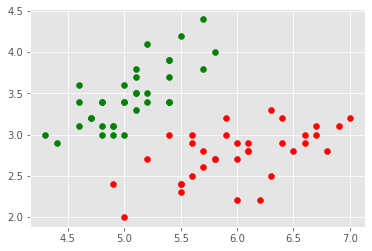

In [67]:
plt.scatter(train['x1'][:35], train['x2'][:35], c = 'g')
plt.scatter(train['x1'][35:], train['x2'][35:], c = 'r')
plt.show

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(train_X,train_y)
print(model.predict_proba(test_X))
print(accuracy_score(test_y,model.predict(test_X)))

[[0.19003304 0.80996696]
 [0.275543   0.724457  ]
 [0.19182308 0.80817692]
 [0.07853787 0.92146213]
 [0.15034323 0.84965677]
 [0.09437235 0.90562765]
 [0.42317749 0.57682251]
 [0.04727084 0.95272916]
 [0.09437235 0.90562765]
 [0.05657101 0.94342899]
 [0.19362594 0.80637406]
 [0.05657101 0.94342899]
 [0.07687694 0.92312306]
 [0.11653956 0.88346044]
 [0.15182948 0.84817052]
 [0.64532471 0.35467529]
 [0.96168028 0.03831972]
 [0.98727251 0.01272749]
 [0.65586087 0.34413913]
 [0.85050959 0.14949041]
 [0.81276466 0.18723534]
 [0.87430864 0.12569136]
 [0.90420937 0.09579063]
 [0.72809098 0.27190902]
 [0.81099483 0.18900517]
 [0.71173859 0.28826141]
 [0.76393421 0.23606579]
 [0.92194505 0.07805495]
 [0.66881765 0.33118235]
 [0.8092122  0.1907878 ]]
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [75]:
def sigmoid(x,weight):
    decision_boundary = x.dot(weight)                                              
    return 1/(1 + np.exp(-1*(decision_boundary)))    

def gradient(x, y, weight):
    grad_sum = np.zeros((3,))
    loss_sum = 0
    for i in range(len(x)):
        proba = sigmoid(x[i,:],weight)
        loss = (proba**y[i,:])*((1-proba)**(1-y[i,:]))
        grad = (y[i,:]-proba)*x[i,:]
        grad_sum += grad
        loss_sum += loss
        
#         print(proba, loss, loss_sum, grad, grad_sum)
    print(loss_sum)
    return grad_sum.reshape(-1,1)

theta0 = 0.001; theta1 = 0.001; theta2 = 0.001
init_weight = np.array([[theta0], [theta1], [theta2]])
gradient(train_X, train_y, init_weight)

[34.99770006]


array([[ -0.16879867],
       [-17.78930499],
       [ 11.72064672]])

In [96]:
def sigmoid(x,weight):
    decision_boundary = x.dot(weight)                                              
    return 1/(1 + np.exp(-1*(decision_boundary)))    

def gradient(x, y, weight):
    grad_sum = np.zeros((3,))
    loss_sum = 0
    for i in range(len(x)):
        proba = sigmoid(x[i,:],weight)
        loss = (proba**y[i,:])*((1-proba)**(1-y[i,:]))
        grad = (y[i,:]-proba)*x[i,:]
        grad_sum += grad
        loss_sum += loss
        print(y[i,:]-proba)
#         print(proba, loss, loss_sum, grad, grad_sum)
#     print(loss_sum)
    return grad_sum.reshape(-1,1)


def gradient_descent(x, y, gradient, init_weight, learn_rate, n_iter=1000, tolerance=1e-6):
    weight = init_weight
    for _ in range(n_iter):
        diff = -learn_rate * gradient(x, y, weight)
        if np.all(np.abs(diff) <= tolerance):
            break
        weight += diff
    return weight

theta0 = 0.1; theta1 = 0.1; theta2 = 0.1
init_weight = np.array([[theta0], [theta1], [theta2]])
final_weights = gradient_descent(train_X, train_y, gradient, init_weight, 1e-4)
# decision_boundary = test_X.dot(final_weights)                                              
# pred = 1/(1 + np.exp(-1*(decision_boundary)))
# accuracy_score(test_y, pred)

[0.27687819]
[0.29110983]
[0.29110983]
[0.2952543]
[0.27687819]
[0.2630841]
[0.2890505]
[0.28090034]
[0.30364507]
[0.2890505]
[0.26697985]
[0.28495789]
[0.29317778]
[0.30364507]
[0.25350602]
[0.24787089]
[0.2630841]
[0.27687819]
[0.2592251]
[0.27091208]
[0.27289178]
[0.27289178]
[0.28495789]
[0.28090034]
[0.28495789]
[0.2890505]
[0.28090034]
[0.2748805]
[0.27687819]
[0.29110983]
[0.29110983]
[0.27289178]
[0.2630841]
[0.25540308]
[0.2890505]
[-0.75398872]
[-0.74269055]
[-0.75026011]
[-0.70682222]
[-0.7369159]
[-0.72111518]
[-0.74269055]
[-0.69635493]
[-0.7407749]
[-0.70889017]
[-0.68997448]
[-0.72908792]
[-0.71504211]
[-0.73105858]
[-0.72111518]
[-0.74649398]
[-0.72312181]
[-0.72111518]
[-0.71909966]
[-0.71300016]
[-0.73302015]
[-0.72908792]
[-0.72710822]
[-0.72908792]
[-0.7369159]
[-0.74269055]
[-0.74269055]
[-0.74459692]
[-0.72908792]
[-0.71707529]
[-0.70889017]
[-0.70889017]
[-0.72111518]
[-0.7251195]
[-0.71909966]
[0.26357464]
[0.27817136]
[0.27844091]
[0.28276232]
[0.2637049]
[0.24

[-0.91914639]
[-0.91953197]
[-0.91914639]
[-0.92670638]
[-0.93175983]
[-0.93321525]
[-0.93361054]
[-0.91828314]
[-0.90695825]
[-0.89864418]
[-0.89864418]
[-0.91088161]
[-0.91555315]
[-0.90553433]
[0.0846332]
[0.09752217]
[0.09975292]
[0.10432715]
[0.0856102]
[0.07246157]
[0.09920236]
[0.08858232]
[0.11403368]
[0.09588941]
[0.07501466]
[0.09375761]
[0.10030621]
[0.11530733]
[0.06338057]
[0.0608451]
[0.07246157]
[0.0846332]
[0.06757828]
[0.08038899]
[0.0789995]
[0.08178169]
[0.09591141]
[0.08757465]
[0.09375761]
[0.09480726]
[0.08858232]
[0.0822444]
[0.08366632]
[0.09975292]
[0.09863193]
[0.0789995]
[0.07416619]
[0.06680784]
[0.09588941]
[-0.9487503]
[-0.93883191]
[-0.94626747]
[-0.90734562]
[-0.93628389]
[-0.91964852]
[-0.93810747]
[-0.89215202]
[-0.93919839]
[-0.90574054]
[-0.8878917]
[-0.92672515]
[-0.91827546]
[-0.9296433]
[-0.91871656]
[-0.94300089]
[-0.92010151]
[-0.92057073]
[-0.92284309]
[-0.91295555]
[-0.92922356]
[-0.92841087]
[-0.92883506]
[-0.92841087]
[-0.93553134]
[-0.94025

[0.01150761]
[0.01601018]
[0.01305607]
[0.01513319]
[0.01523309]
[0.01342995]
[0.01154567]
[0.01191608]
[0.01710479]
[0.01663034]
[0.01057104]
[0.00955064]
[0.00772759]
[0.01566832]
[-0.99569711]
[-0.99382321]
[-0.99528198]
[-0.98590989]
[-0.9933964]
[-0.98932363]
[-0.99364507]
[-0.98048091]
[-0.99397643]
[-0.98514141]
[-0.97915149]
[-0.99111113]
[-0.98921726]
[-0.99186333]
[-0.98901714]
[-0.99467766]
[-0.98935886]
[-0.98962166]
[-0.99043562]
[-0.9875384]
[-0.99165682]
[-0.99160136]
[-0.99180924]
[-0.99160136]
[-0.99320602]
[-0.99416475]
[-0.99448751]
[-0.9945058]
[-0.99135969]
[-0.98862708]
[-0.98634694]
[-0.98634694]
[-0.98962166]
[-0.99079474]
[-0.988005]
[0.01065722]
[0.01418806]
[0.01504415]
[0.01652717]
[0.01097527]
[0.00776549]
[0.01499727]
[0.01171293]
[0.01993704]
[0.01373521]
[0.00828922]
[0.01325512]
[0.01509118]
[0.02052629]
[0.00586033]
[0.00547194]
[0.00776549]
[0.01065722]
[0.00665803]
[0.00966536]
[0.00914117]
[0.00998538]
[0.01405572]
[0.01137375]
[0.01325512]
[0.01333

[-0.99873639]
[-0.99833492]
[-0.99833492]
[-0.99889925]
[-0.99908376]
[-0.99861729]
[0.00125075]
[0.00191052]
[0.00209691]
[0.00241418]
[0.00131039]
[0.00078137]
[0.00209554]
[0.00144018]
[0.00319951]
[0.00182244]
[0.00085881]
[0.00173728]
[0.00209827]
[0.00335174]
[0.000512]
[0.00046552]
[0.00078137]
[0.00125075]
[0.00061814]
[0.00108551]
[0.00098958]
[0.00113801]
[0.0019068]
[0.00137465]
[0.00173728]
[0.00173955]
[0.00144018]
[0.00113875]
[0.00119383]
[0.00209691]
[0.00200155]
[0.00098958]
[0.00085769]
[0.00061734]
[0.00182244]
[-0.99975779]
[-0.99957454]
[-0.99972106]
[-0.99848526]
[-0.99953205]
[-0.99900849]
[-0.99955424]
[-0.99746427]
[-0.99959365]
[-0.9983385]
[-0.99721163]
[-0.99925226]
[-0.99900655]
[-0.99935025]
[-0.9989612]
[-0.99966344]
[-0.99900913]
[-0.99905362]
[-0.99917655]
[-0.99874517]
[-0.99931969]
[-0.99931881]
[-0.9993494]
[-0.99931881]
[-0.99950972]
[-0.99961241]
[-0.99964692]
[-0.99964715]
[-0.99928631]
[-0.99891024]
[-0.99855512]
[-0.99855512]
[-0.99905362]
[-0.9

[-0.99995201]
[-0.99996471]
[-0.99996886]
[-0.99996881]
[-0.9999214]
[-0.99986343]
[-0.99980262]
[-0.99980262]
[-0.9998864]
[-0.99991123]
[-0.99984499]
[0.00014327]
[0.00025077]
[0.00028479]
[0.00034342]
[0.00015268]
[7.68020039e-05]
[0.00028531]
[0.00017276]
[0.00049934]
[0.00023574]
[8.69065449e-05]
[0.00022202]
[0.00028427]
[0.00053213]
[4.37151276e-05]
[3.87029027e-05]
[7.68020039e-05]
[0.00014327]
[5.60775402e-05]
[0.00011902]
[0.00010461]
[0.00012661]
[0.00025214]
[0.00016212]
[0.00022202]
[0.00022121]
[0.00017276]
[0.00012638]
[0.00013444]
[0.00028479]
[0.00026724]
[0.00010461]
[8.72248456e-05]
[5.62829341e-05]
[0.00023574]
[-0.99998409]
[-0.99996623]
[-0.99998082]
[-0.99981789]
[-0.99996186]
[-0.99989596]
[-0.99996401]
[-0.99963669]
[-0.99996837]
[-0.99979281]
[-0.99958966]
[-0.99992846]
[-0.99989653]
[-0.99994078]
[-0.99988913]
[-0.99997534]
[-0.99989577]
[-0.99990238]
[-0.99991949]
[-0.99985804]
[-0.99993678]
[-0.99993701]
[-0.999941]
[-0.99993701]
[-0.99995935]
[-0.99997027]

[-0.99999726]
[-0.99999725]
[-0.99999136]
[-0.99998293]
[-0.99997311]
[-0.99997311]
[-0.9999864]
[-0.99998998]
[-0.99997995]
[1.89107938e-05]
[3.75744704e-05]
[4.40504943e-05]
[5.54551712e-05]
[2.04757324e-05]
[8.7900749e-06]
[4.42331783e-05]
[2.3806955e-05]
[8.7886142e-05]
[3.48466575e-05]
[1.02201626e-05]
[3.24508951e-05]
[4.38685648e-05]
[9.51585043e-05]
[4.38741177e-06]
[3.78913643e-06]
[8.7900749e-06]
[1.89107938e-05]
[5.95575547e-06]
[1.50838652e-05]
[1.28131367e-05]
[1.62646625e-05]
[3.80438956e-05]
[2.19874202e-05]
[3.24508951e-05]
[3.21833996e-05]
[2.3806955e-05]
[1.61974872e-05]
[1.74654597e-05]
[4.40504943e-05]
[4.06838349e-05]
[1.28131367e-05]
[1.03051104e-05]
[6.00525862e-06]
[3.48466575e-05]
[-0.99999875]
[-0.99999683]
[-0.99999843]
[-0.99997486]
[-0.99999633]
[-0.99998734]
[-0.99999657]
[-0.99994094]
[-0.99999709]
[-0.9999704]
[-0.99993162]
[-0.99999202]
[-0.9999875]
[-0.99999368]
[-0.9999863]
[-0.99999785]
[-0.99998729]
[-0.99998831]
[-0.99999083]
[-0.99998148]
[-0.9999

[-0.99999911]
[-0.99999942]
[-0.99999952]
[-0.99999951]
[-0.99999822]
[-0.99999614]
[-0.99999353]
[-0.99999353]
[-0.99999701]
[-0.99999789]
[-0.99999535]
[4.45086309e-06]
[9.68144693e-06]
[1.16104705e-05]
[1.50725166e-05]
[4.87415398e-06]
[1.86849465e-06]
[1.16778758e-05]
[5.7780476e-06]
[2.54013147e-05]
[8.89200055e-06]
[2.21500123e-06]
[8.21434059e-06]
[1.15434542e-05]
[2.78170031e-05]
[8.49113748e-07]
[7.20439852e-07]
[1.86849465e-06]
[4.45086309e-06]
[1.20017426e-06]
[3.44842891e-06]
[2.85888763e-06]
[3.7545879e-06]
[9.85104679e-06]
[5.27625941e-06]
[8.21434059e-06]
[8.11978674e-06]
[5.7780476e-06]
[3.73291605e-06]
[4.06433232e-06]
[1.16104705e-05]
[1.06021773e-05]
[2.85888763e-06]
[2.24079478e-06]
[1.21415023e-06]
[8.89200055e-06]
[-0.9999998]
[-0.99999942]
[-0.99999974]
[-0.99999389]
[-0.99999931]
[-0.99999719]
[-0.99999936]
[-0.99998387]
[-0.99999947]
[-0.99999263]
[-0.99998099]
[-0.99999833]
[-0.99999724]
[-0.99999872]
[-0.99999692]
[-0.99999963]
[-0.99999717]
[-0.99999743]
[-0

[-0.99999991]
[-0.99999954]
[-0.99999991]
[-0.9999966]
[-0.99999993]
[-0.99999861]
[-0.99999591]
[-0.99999975]
[-0.99999955]
[-0.99999981]
[-0.99999949]
[-0.99999995]
[-0.99999953]
[-0.99999958]
[-0.9999997]
[-0.99999925]
[-0.99999979]
[-0.99999979]
[-0.99999982]
[-0.99999979]
[-0.9999999]
[-0.99999994]
[-0.99999995]
[-0.99999995]
[-0.99999977]
[-0.99999944]
[-0.99999898]
[-0.99999898]
[-0.99999958]
[-0.99999972]
[-0.9999993]
[6.78701657e-07]
[1.66064548e-06]
[2.05112366e-06]
[2.77123203e-06]
[7.54286647e-07]
[2.4958766e-07]
[2.06746169e-06]
[9.16980638e-07]
[5.05864981e-06]
[1.50613911e-06]
[3.03421885e-07]
[1.3768888e-06]
[2.03491473e-06]
[5.62201389e-06]
[1.00399942e-07]
[8.32444496e-08]
[2.4958766e-07]
[6.78701657e-07]
[1.49563875e-07]
[5.06341192e-07]
[4.06707876e-07]
[5.58283953e-07]
[1.70064558e-06]
[8.25092544e-07]
[1.3768888e-06]
[1.35521316e-06]
[9.16980638e-07]
[5.5387213e-07]
[6.10690826e-07]
[2.05112366e-06]
[1.84558644e-06]
[4.06707876e-07]
[3.08274902e-07]
[1.51956043e-0

[1.48820012e-07]
[2.64781295e-07]
[2.59582987e-07]
[1.67659724e-07]
[9.5171804e-08]
[1.06162265e-07]
[4.14038088e-07]
[3.67513161e-07]
[6.72220256e-08]
[4.94011483e-08]
[2.23145062e-08]
[2.92444616e-07]
[-1.]
[-0.99999999]
[-1.]
[-0.99999982]
[-0.99999999]
[-0.99999993]
[-0.99999999]
[-0.99999937]
[-0.99999999]
[-0.99999977]
[-0.99999923]
[-0.99999997]
[-0.99999994]
[-0.99999998]
[-0.99999993]
[-1.]
[-0.99999993]
[-0.99999994]
[-0.99999996]
[-0.99999989]
[-0.99999997]
[-0.99999997]
[-0.99999998]
[-0.99999997]
[-0.99999999]
[-0.99999999]
[-0.99999999]
[-0.99999999]
[-0.99999997]
[-0.99999992]
[-0.99999984]
[-0.99999984]
[-0.99999994]
[-0.99999996]
[-0.9999999]
[1.03492553e-07]
[2.84844485e-07]
[3.62349444e-07]
[5.09510181e-07]
[1.16726376e-07]
[3.33388357e-08]
[3.66019983e-07]
[1.45523929e-07]
[1.00740317e-06]
[2.55108611e-07]
[4.15638575e-08]
[2.30791397e-07]
[3.58715715e-07]
[1.13622192e-06]
[1.18712719e-08]
[9.61853719e-09]
[3.33388357e-08]
[1.03492553e-07]
[1.86382566e-08]
[7.434657

[4.40825776e-09]
[1.96989022e-08]
[1.49980661e-08]
[2.21876966e-08]
[8.70151615e-08]
[3.57102573e-08]
[6.70209075e-08]
[6.54886522e-08]
[4.06897757e-08]
[2.19325986e-08]
[2.47036019e-08]
[1.09122217e-07]
[9.57680991e-08]
[1.49980661e-08]
[1.07415991e-08]
[4.51139881e-09]
[7.46205364e-08]
[-1.]
[-1.]
[-1.]
[-0.99999996]
[-1.]
[-0.99999999]
[-1.]
[-0.99999983]
[-1.]
[-0.99999994]
[-0.99999978]
[-0.99999999]
[-0.99999999]
[-1.]
[-0.99999998]
[-1.]
[-0.99999999]
[-0.99999999]
[-0.99999999]
[-0.99999997]
[-0.99999999]
[-0.99999999]
[-1.]
[-0.99999999]
[-1.]
[-1.]
[-1.]
[-1.]
[-0.99999999]
[-0.99999998]
[-0.99999996]
[-0.99999996]
[-0.99999999]
[-0.99999999]
[-0.99999998]
[2.43570165e-08]
[7.33889794e-08]
[9.54993586e-08]
[1.38473698e-07]
[2.77849036e-08]
[7.08651182e-09]
[9.66260527e-08]
[3.53175803e-08]
[2.91139368e-07]
[6.50938305e-08]
[9.00771335e-09]
[5.84174497e-08]
[9.43858023e-08]
[3.32112885e-07]
[2.29740826e-09]
[1.82873139e-09]
[7.08651182e-09]
[2.43570165e-08]
[3.7557446e-09]
[1.

[1.68707722e-08]
[2.54592611e-08]
[4.29972435e-09]
[9.46583922e-10]
[1.71064664e-08]
[5.60485369e-09]
[5.79785648e-08]
[1.10255124e-08]
[1.23390786e-09]
[9.7917946e-09]
[1.66383256e-08]
[6.71204149e-08]
[2.71644707e-10]
[2.11301643e-10]
[9.46583922e-10]
[3.71409881e-09]
[4.68030281e-10]
[2.49555954e-09]
[1.83640414e-09]
[2.84924484e-09]
[1.31231062e-08]
[4.84146856e-09]
[9.7917946e-09]
[9.52382939e-09]
[5.60485369e-09]
[2.8099878e-09]
[3.20823568e-09]
[1.68707722e-08]
[1.45729604e-08]
[1.83640414e-09]
[1.26862565e-09]
[4.81198859e-10]
[1.10255124e-08]
[-1.]
[-1.]
[-1.]
[-0.99999999]
[-1.]
[-1.]
[-1.]
[-0.99999997]
[-1.]
[-0.99999999]
[-0.99999996]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-0.99999999]
[-0.99999999]
[-1.]
[-1.]
[-1.]
[3.21384497e-09]
[1.09916501e-08]
[1.47646184e-08]
[2.23494694e-08]
[3.72481401e-09]
[8.10787881e-10]
[1.49733588e-08]
[4.86485519e-09]
[5.12102842e-08]
[9.61789948e-09]
[1.05894316e-0

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[5.66347191e-10]
[2.15918727e-09]
[2.98036484e-09]
[4.68084482e-09]
[6.6538397e-10]
[1.26440414e-10]
[3.02849124e-09]
[8.89482932e-10]
[1.1546062e-08]
[1.8674875e-09]
[1.69025016e-10]
[1.64127734e-09]
[2.93300295e-09]
[1.35651135e-08]
[3.21191962e-11]
[2.44149145e-11]
[1.26440414e-10]
[5.66347191e-10]
[5.83246784e-11]
[3.6642489e-10]
[2.6124547e-10]
[4.23659996e-10]
[2.26548424e-09]
[7.57090834e-10]
[1.64127734e-09]
[1.58952784e-09]
[8.89482932e-10]
[4.16927604e-10]
[4.82051288e-10]
[2.98036484e-09]
[2.5367628e-09]
[2.6124547e-10]
[1.74527948e-10]
[6.02233818e-11]
[1.8674875e-09]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-0.99999999]
[-1.]
[-1.]
[-0.99999999]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[4.90065544e-10]
[1.88535276e-09]
[2.60829491e-09

[4.00515177e-11]
[2.75317547e-11]
[4.69855266e-11]
[2.98483238e-10]
[8.89908147e-11]
[2.09009476e-10]
[2.01419992e-10]
[1.06346265e-10]
[4.61246596e-11]
[5.41100498e-11]
[4.03253653e-10]
[3.37443851e-10]
[2.75317547e-11]
[1.76954007e-11]
[5.47450973e-12]
[2.40701903e-10]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[5.59534641e-11]
[2.46562326e-10]
[3.52911478e-10]
[5.82192961e-10]
[6.69415634e-11]
[1.06135101e-11]
[3.59558161e-10]
[9.23054966e-11]
[1.58441682e-09]
[2.09971818e-10]
[1.46349599e-11]
[1.82179161e-10]
[3.46387585e-10]
[1.8955657e-09]
[2.32036612e-12]
[1.71440639e-12]
[1.06135101e-11]
[5.59534641e-11]
[4.49484894e-12]
[3.45563578e-11]
[2.36966002e-11]
[4.05784295e-11]
[2.6075786e-10]
[7.71540609e-11]
[1.82179161e-10]
[1.75505832e-10]
[9.23054966e-11]
[3.98281408e-11]
[4.6768811e-11]
[3.52911478e-10]
[2.94982483

[2.90145685e-12]
[5.21094279e-12]
[3.93258759e-11]
[1.04602993e-11]
[2.66164868e-11]
[2.55233612e-11]
[1.27147182e-11]
[5.10280707e-12]
[6.07380812e-12]
[5.45616885e-11]
[4.48872051e-11]
[2.90145685e-12]
[1.79412041e-12]
[4.9760196e-13]
[3.10242942e-11]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[6.38844533e-12]
[3.22448734e-11]
[4.77502482e-11]
[8.24875723e-11]
[7.77422571e-12]
[1.04005693e-12]
[4.87700991e-11]
[1.1036061e-11]
[2.46158871e-10]
[2.70634626e-11]
[1.47659662e-12]
[2.31996644e-11]
[4.67514916e-11]
[2.99551939e-10]
[1.97619698e-13]
[1.42108547e-13]
[1.04005693e-12]
[6.38844533e-12]
[4.06563672e-13]
[3.77720077e-12]
[2.49733567e-12]
[4.50040005e-12]
[3.43554074e-11]
[9.0689678e-12]
[2.31996644e-11]
[2.22395435e-11]
[1.1036061e-11]
[4.40625314e-12]
[5.24980059e-12]
[4.77502482e-11]
[3.92390564e-11]
[2.49733567e

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[9.74109682e-13]
[5.53090906e-12]
[8.43547454e-12]
[1.51658686e-11]
[1.20303767e-12]
[1.38999923e-13]
[8.63420446e-12]
[1.75148784e-12]
[4.90210095e-11]
[4.58388882e-12]
[2.02282635e-13]
[3.88866717e-12]
[8.24140756e-12]
[6.05397954e-11]
[2.33146835e-14]
[1.64313008e-14]
[1.38999923e-13]
[9.74109682e-13]
[5.06261699e-14]
[5.54667423e-13]
[3.55271368e-13]
[6.69242439e-13]
[5.9308114e-12]
[1.41819889e-12]
[3.88866717e-12]
[3.71169762e-12]
[1.75148784e-12]
[6.53699317e-13]
[7.88702437e-13]
[8.43547454e-12]
[6.83053614e-12]
[3.55271368e-13]
[2.11830553e-13]
[5.30686606e-14]
[4.58388882e-12]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[8.4288132e-13]
[4.82947016e-12]
[7.38231698e-12]
[1.33133504e-11]
[1.04227738e-12]
[1.19015908e-13]
[7.55751017e-12]
[1.52011737e-12]
[4.32982539e-

[1.86517468e-14]
[1.48547841e-13]
[6.21724894e-15]
[8.149037e-14]
[5.06261699e-14]
[9.9475983e-14]
[1.02384767e-12]
[2.2182256e-13]
[6.51700915e-13]
[6.19504448e-13]
[2.77999845e-13]
[9.70334924e-14]
[1.18571819e-13]
[1.49014134e-12]
[1.18904886e-12]
[5.06261699e-14]
[2.90878432e-14]
[6.66133815e-15]
[7.76489983e-13]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[1.28563826e-13]
[8.28448421e-13]
[1.30406796e-12]
[2.44781972e-12]
[1.61204383e-13]
[1.59872116e-14]
[1.33804079e-12]
[2.41140441e-13]
[8.62265814e-12]
[6.77236045e-13]
[2.37587727e-14]
[5.68212144e-13]
[1.27120536e-12]
[1.08191234e-11]
[2.44249065e-15]
[1.55431223e-15]
[1.59872116e-14]
[1.28563826e-13]
[5.32907052e-15]
[7.01660952e-14]
[4.35207426e-14]
[8.59312621e-14]
[8.94395669e-13]
[1.92290628e-13]
[5.68212144e-13]
[5.39790435e-13]
[2.41140441e-13]
[8.37108161e

[2.01616501e-13]
[1.58095759e-13]
[5.32907052e-15]
[2.88657986e-15]
[6.66133815e-16]
[1.00142117e-13]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[1.46549439e-14]
[1.08357767e-13]
[1.76525461e-13]
[3.46833673e-13]
[1.86517468e-14]
[1.55431223e-15]
[1.81410442e-13]
[2.88657986e-14]
[1.3395951e-12]
[8.72635297e-14]
[2.44249065e-15]
[7.23865412e-14]
[1.7164048e-13]
[1.70974346e-12]
[2.22044605e-16]
[2.22044605e-16]
[1.55431223e-15]
[1.46549439e-14]
[4.4408921e-16]
[7.77156117e-15]
[4.6629367e-15]
[9.54791801e-15]
[1.17905685e-13]
[2.26485497e-14]
[7.23865412e-14]
[6.83897383e-14]
[2.88657986e-14]
[9.32587341e-15]
[1.15463195e-14]
[1.76525461e-13]
[1.38333789e-13]
[4.6629367e-15]
[2.44249065e-15]
[4.4408921e-16]
[8.72635297e-14]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[2.22044605e-15]
[1.86517468e-14]
[3.10862447e-14]
[6.37268016e-14]
[2.88657986e-15]
[2.22044605e-16]
[3.21964677e-14]
[4.6629367e-15]
[2.66675571e-13]
[1.48769885e-14]
[2.22044605e-16]
[1.22124533e-14]
[3.01980663e-14]
[3.45501405e-13]
[0.]
[0.]
[2.22044605e-16]
[2.22044605e-15]
[0.]
[1.11022302e-15]
[6.66133815e-16]
[1.33226763e-15]
[2.04281037e-14]
[3.55271368e-15]
[1.22124533e-14]
[1.13242749e-14]
[4.6629367e-15]
[1.33226763e-15]
[1.77635684e-15]
[3.10862447e-14]
[2.39808173e-14]
[6.66133815e-16]
[4.4408921e-16]
[0.]
[1.48769885e-14]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[1.99840144e-15]
[1.62092562e-14]
[2.73114864e-1

[2.22044605e-16]
[0.]
[2.22044605e-16]
[3.10862447e-15]
[4.4408921e-16]
[1.77635684e-15]
[1.55431223e-15]
[6.66133815e-16]
[2.22044605e-16]
[2.22044605e-16]
[4.88498131e-15]
[3.55271368e-15]
[0.]
[0.]
[0.]
[2.22044605e-15]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[2.22044605e-16]
[2.44249065e-15]
[4.21884749e-15]
[9.1038288e-15]
[4.4408921e-16]
[0.]
[4.4408921e-15]
[4.4408921e-16]
[4.15223411e-14]
[1.99840144e-15]
[0.]
[1.55431223e-15]
[3.99680289e-15]
[5.46229728e-14]
[0.]
[0.]
[0.]
[2.22044605e-16]
[0.]
[2.22044605e-16]
[0.]
[2.22044605e-16]
[2.66453526e-15]
[4.4408921e-16]
[1.55431223e-15]
[1.55431223e-15]
[4.4408921e-16]
[2.22044605e-16]
[2.22044605e-16]
[4.21884749e-15]
[3.10862447e-15]
[0.]
[0.]
[0.]
[1.99840144e-15]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-

[-1.]
[-1.]
[-1.]
[0.]
[4.4408921e-16]
[6.66133815e-16]
[1.55431223e-15]
[0.]
[0.]
[6.66133815e-16]
[0.]
[7.32747196e-15]
[2.22044605e-16]
[0.]
[2.22044605e-16]
[6.66133815e-16]
[9.76996262e-15]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[4.4408921e-16]
[0.]
[2.22044605e-16]
[2.22044605e-16]
[0.]
[0.]
[0.]
[6.66133815e-16]
[4.4408921e-16]
[0.]
[0.]
[0.]
[2.22044605e-16]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[2.22044605e-16]
[6.66133815e-16]
[1.33226763e-15]
[0.]
[0.]
[6.66133815e-16]
[0.]
[6.43929354e-15]
[2.22044605e-16]
[0.]
[2.22044605e-16]
[4.4408921e-16]
[8.65973959e-15]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[4.4408921e-16]
[0.]
[2.22044605e-16]
[2.22044605e-16]
[0.]
[0.]
[0.]
[6.66133815e-16]
[4.4408921e-16]
[0.]
[0.]
[0.]
[2.22044605e-16]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[2.22044605e-16]
[0.]
[0.]
[0.]
[0.]
[2.22044605e-16]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[2.22044605e-16]
[0.]
[0.]
[0.]
[0.]
[2.22044605e-16]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]


[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1

[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]


[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.

In [120]:
def gradient(x,y,weight):
    decision_boundary = x.dot(weight)                                              
    sig_h = 1/(1 + np.exp(-1*(decision_boundary)))
#     print(y-sig_h)
    return -1*((y-sig_h)*x).sum(axis=0).reshape(-1,1)


def gradient_descent(x, y, gradient, init_weight, learn_rate, n_iter=1000, tolerance=1e-6):
    weight = init_weight
    for _ in range(n_iter):
        diff = -learn_rate * gradient(x, y, weight)
        if np.all(np.abs(diff) <= tolerance):
            break
        weight += diff
    return weight

loss_records = []
theta0 = 0.001; theta1 = 0.001; theta2 = 0.001
init_weight = np.array([[theta0], [theta1], [theta2]])
final_weights = gradient_descent(train_X, train_y, gradient, init_weight, 1e-4)
decision_boundary = test_X.dot(final_weights)                                              
print(decision_boundary)
pred = 1/(1 + np.exp(-1*(decision_boundary)))
pred = np.round(pred, decimals=0)
accuracy_score(test_y, pred)

[[ 0.42336239]
 [ 0.43031166]
 [ 0.3724563 ]
 [ 0.6130882 ]
 [ 0.59805906]
 [ 0.79473413]
 [-0.32633036]
 [ 0.86066936]
 [ 0.79473413]
 [ 1.09322138]
 [ 0.32155022]
 [ 1.09322138]
 [ 0.71490037]
 [ 0.82366181]
 [ 0.54715297]
 [-0.0579014 ]
 [-0.93946461]
 [-1.63825128]
 [-0.26152574]
 [-0.80759415]
 [-0.68380357]
 [-0.62594822]
 [-0.90245706]
 [-0.69075284]
 [-0.63289749]
 [-0.33441024]
 [-0.45820082]
 [-0.8226233 ]
 [-0.51605617]
 [-0.5819914 ]]


0.9666666666666667

In [162]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
# input image dimensions 28x28
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [165]:
import numpy as np
np.random.seed(42)
for i in range(10): 
    ind = np.where(y_train==i)
    if i == 0:
        new_X = x_train[np.random.choice(ind[0], 100)]
    else:
        new_X = np.concatenate((new_X,x_train[np.random.choice(ind[0],100)]), axis=0)

0
1
2
3
4
5
6
7
8
9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


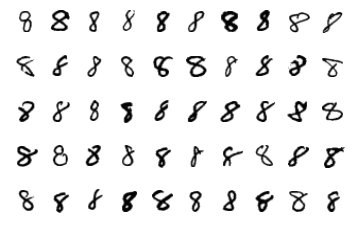

In [155]:
import numpy as np
import matplotlib.pyplot as plt
amount= 50
lines = 5
columns = 10
number = np.zeros(amount)

for i in range(amount):
    number[i] = y_test[i]
    # print(number[0])

fig = plt.figure()

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(X[i+100,:,:], cmap='binary')
    plt.sca(ax)
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
plt.show()